In [83]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import ingest
import numpy as np
import pandas as pd
df = ingest.setup('../../capture')


Dropped 1 outlier coordinate


Processing with 7 cores...


HBox(children=(IntProgress(value=0, description='Methods', max=12), HTML(value='')))

method
random                 -3.905325
krogh                   1.042239
akima                   6.553861
cubic                   6.963265
pchip                   6.997662
quadratic               6.997662
slinear                 7.438635
from_derivatives        7.464594
piecewise_polynomial    7.464594
linear                  7.492831
naive                   7.492831
barycentric             8.438635
Name: error, dtype: float64


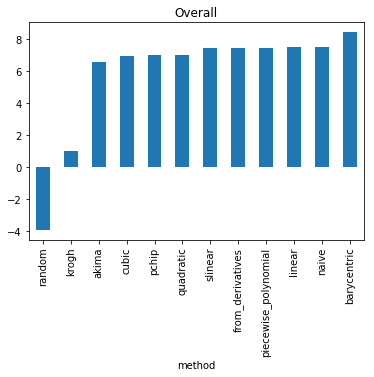

In [84]:
import warnings
warnings.filterwarnings('ignore')
errors = ingest.compare_errors()
# Print the median results by method
errors.groupby('method')['error'].median().sort_values().plot(kind='bar', title="Overall")
print(errors.groupby('method')['error'].median().sort_values())

Text(0,0.5,'error (degrees)')

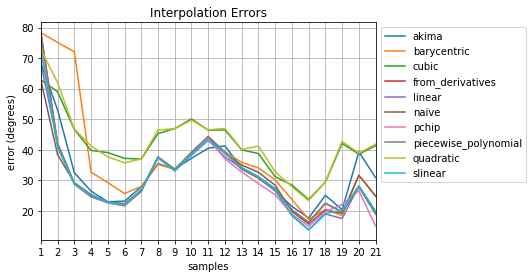

In [88]:
# For display purposes, eliminate Random and Krogh
median_errors = errors.groupby(['method', 'samples'])['error'].apply(lambda x: pd.Series.mean(pd.Series.abs(x))).unstack().T
median_errors_reduced = median_errors.drop(median_errors[['random','krogh']], axis=1)
#median_errors_reduced = median_errors
ax = median_errors_reduced.plot(xticks=median_errors_reduced.index.values, grid=True, title="Interpolation Errors")
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("error (degrees)")

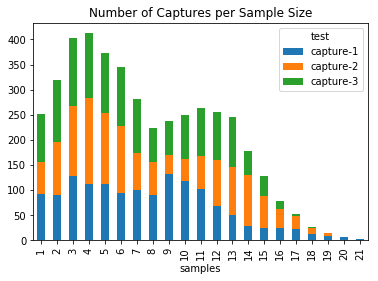

In [12]:
sample_spread = errors[errors['method']=='naive'].groupby(['test','samples'])['error'].count().unstack().T
sample_spread.plot(kind='bar', stacked=True, title="Number of Captures per Sample Size")


89

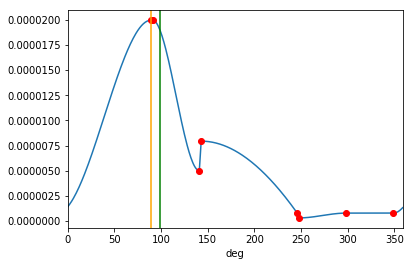

In [59]:
locate.locate_interpolate(ingest.prep_for_plot(ingest.get_set('capture-1', 4, '00:12:17:9f:79:b6')), 'pchip', True, test='capture-1', bssid='00:12:17:9f:79:b6')

